Starting:
Make sure you have at least these dependencies:
```
python ver. >3
numpy
pandas
seaborn
matplotlib
scipy
flowcyto_script
FlowCytometryTools
```



initialize the script:


In [68]:
from flowcyto_script import flowData as fD
from flowcyto_script import dataCollector as collector
from flowcyto_script import gates
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(font_scale=2)  #big fonts
# folderDir = '/home/jeron/Documents/flow_data/20181207_HEK_COS/'
folderDir =input('What is the folder path to the fcs files? i.e. /home/jeron/Documents/flow_data/20181207_HEK_COS/\n\n')
filePaths_fcs = !ls $folderDir*.fcs
filePaths_csv = !ls $folderDir*sample*.csv
print('\n\nwe found these files:\n')
for x in filePaths_fcs:
    print(x)



we found these files:

/home/jeron/Documents/flow_data/20181207_HEK_COS/Specimen_001_Tube_001.fcs
/home/jeron/Documents/flow_data/20181207_HEK_COS/Specimen_001_Tube_002.fcs
/home/jeron/Documents/flow_data/20181207_HEK_COS/Specimen_001_Tube_003.fcs
/home/jeron/Documents/flow_data/20181207_HEK_COS/Specimen_001_Tube_004.fcs
/home/jeron/Documents/flow_data/20181207_HEK_COS/Specimen_001_Tube_005.fcs
/home/jeron/Documents/flow_data/20181207_HEK_COS/Specimen_001_Tube_006.fcs
/home/jeron/Documents/flow_data/20181207_HEK_COS/Specimen_001_Tube_007.fcs
/home/jeron/Documents/flow_data/20181207_HEK_COS/Specimen_001_Tube_008.fcs
/home/jeron/Documents/flow_data/20181207_HEK_COS/Specimen_001_Tube_009.fcs
/home/jeron/Documents/flow_data/20181207_HEK_COS/Specimen_001_Tube_010.fcs
/home/jeron/Documents/flow_data/20181207_HEK_COS/Specimen_001_Tube_011.fcs
/home/jeron/Documents/flow_data/20181207_HEK_COS/Specimen_001_Tube_012.fcs
/home/jeron/Documents/flow_data/20181207_HEK_COS/Specimen_001_Tube_013.fcs


## Analysis
Analyzing with gating (for custom gating use <fD_obj>.cGate(vertice))

In [11]:
sampleDataEntry=pd.read_csv(filePaths_csv[0],delimiter='\t')
df1, collection =collector(sampleDataEntry,filePaths_fcs)
df1.to_csv(folderDir+'flowData_out.csv')
print('Analyzed data saved to \"{}flowData_out.csv\"'.format(folderDir))
print('\nData preview:')
df1

Analyzed data saved to "/home/jeron/Documents/flow_data/20181207_HEK_COS/flowData_out.csv"

Data preview:


,cells,MOI,Virus,geoMean,Percent +ve (%),TI,flow_date
0,HEK293T,1000,L6,266.711,20.9846,55.9683,07-DEC-2018
1,HEK293T,1000,L6,260.115,20.1771,52.4837,07-DEC-2018
2,HEK293T,1000,L6,255.858,21.3613,54.6545,07-DEC-2018
3,HEK293T,5000,L6,403.005,57.1206,230.199,07-DEC-2018
4,HEK293T,5000,L6,398.131,57.8274,230.229,07-DEC-2018
5,HEK293T,5000,L6,385.252,58.936,227.052,07-DEC-2018
6,HEK293T,10000,L6,582.833,74.0169,431.395,07-DEC-2018
7,HEK293T,10000,L6,539.874,73.0018,394.118,07-DEC-2018
8,HEK293T,10000,L6,540.925,72.5895,392.655,07-DEC-2018
9,COS7,1000,L6,206.312,3.50877,7.23902,07-DEC-2018


## Graphics

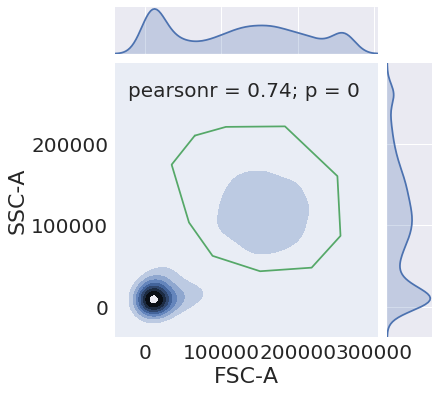

In [67]:
## show gating
keys = list(collection.keys())

# g=sns.jointplot(x=collection[keys[0]].Data['FSC-A'],y=collection[keys[0]].Data['SSC-A'],kind='kde')
gates_P = gates[collection[keys[1]].Cells]
gates_P.append(gates_P[0])
X = [x for x ,y in gates_P]
Y = [y for x ,y in gates_P]

g=sns.jointplot(x=collection[keys[1]].Data['FSC-A'],y=collection[keys[1]].Data['SSC-A'],kind='kde')
plt.sca(g.ax_joint)
plt.plot(X,Y)

/home/jeron/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/jeron/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/jeron/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'HEK293T cells transduced with L6')

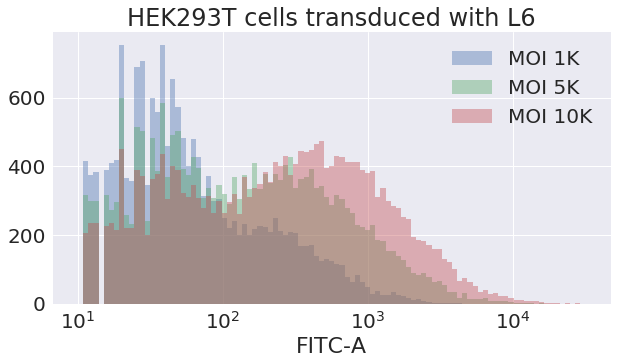

In [29]:
keys = list(collection.keys())
specificFlows = [collection[keys[x]].Data for x in range(0,3)]
specificFlows2 = [collection[keys[x]].Data for x in range(3,6)]
specificFlows3 = [collection[keys[x]].Data for x in range(6,9)]

specificFlows = pd.concat(specificFlows)
specificFlows2 = pd.concat(specificFlows2)
specificFlows3 = pd.concat(specificFlows3)

fig3, ax3 = plt.subplots()
g=sns.distplot(specificFlows['FITC-A'],bins=np.logspace(1,4.5,100),kde=False,ax=ax3)
g=sns.distplot(specificFlows2['FITC-A'],bins=np.logspace(1,4.5,100),kde=False,ax=ax3)
g=sns.distplot(specificFlows3['FITC-A'],bins=np.logspace(1,4.5,100),kde=False,ax=ax3)

g.set_xscale('log')
fig3.set_size_inches([10,5])
g.legend(('MOI 1K','MOI 5K','MOI 10K'))
ax3.set_title('HEK293T cells transduced with L6')
